*Solved by Georg Wallmann*
## Solving simple differential equations
### 1. Ideal pendulum without friction

An ideal mathematical pendulum consists of a point mass attached to a massless rod.<br>
The forces acting tangentially on the point mass originate from the gravitation and accelaration from kinetic energy.<br>
The system is described by the phase $\rho(t)$ and its derivatives.

$F_{tan} = -mg \cdot \sin(\rho)$

$F_{tan} = ml \cdot \ddot{\rho}(t)$

$\ddot{\rho}(t) = - \frac{g}{l} \sin(\rho)$

Subsititute the constant parts<br>
$ a = -\frac{g}{l}$

This second order Differential equation can then be substitute for omega, to get two first order differential equations<br>
$\dot{\rho} = \omega$

$\begin{pmatrix}
    \dot{\rho} \\
    \dot{\omega}
\end{pmatrix}
=
\begin{pmatrix}
    \omega \\
    a \cdot \sin(\rho)
\end{pmatrix}
$

This system can easily be solved with a standard integrator for differential equations like the odeint package from scipy<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html.<br>
The results will later be compared to two different ODE solver implementations.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [19]:
def system(v,t, a, b):
    rho = v[0] 
    omega = v[1]
    dvdt = np.array([omega, a*np.sin(rho) + b*omega])
    return dvdt


In [4]:
# initial conditions
# 22.5 deg deflection, 0 velocity
v0 = [np.pi/8,0]

t = np.linspace(0,20,200)

In [5]:
solution = odeint(system, v0, t, args=(-2,0))

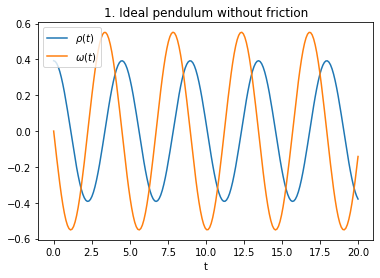

In [6]:
plt.plot(t,solution[:,0], label=r"$\rho(t)$")
plt.plot(t,solution[:,1], label=r"$\omega(t)$")
plt.title("1. Ideal pendulum without friction")
plt.xlabel("t")
plt.legend(loc='best')

### 2. Velocity dependent component, air resistance 

$F_{tan} = -mg \cdot \sin(\rho)$

One can introduca a velocity dependent component which can dampen ($b<0$) or accalerate ($b>0$) the system.

$F_{tan} = ml \cdot \ddot{\rho}(t) + b \cdot \dot{\rho}(t)$

$\begin{pmatrix}
    \dot{\rho} \\
    \dot{\omega}
\end{pmatrix}
=
\begin{pmatrix}
    \omega \\
    a \cdot \sin(\rho) + b \cdot \omega
\end{pmatrix}
$

In [7]:
t = np.linspace(0,20,200)

# initial conditions
# 22.5 deg deflection, 0 velocity

v0 = [np.pi/8,0]

solution = odeint(system, v0, t, args=(-2,-0.3))

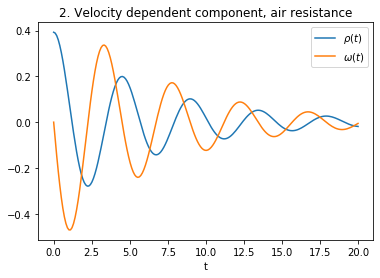

In [8]:
plt.plot(t,solution[:,0], label=r"$\rho(t)$")
plt.plot(t,solution[:,1], label=r"$\omega(t)$")
plt.title("2. Velocity dependent component, air resistance")
plt.xlabel("t")
plt.legend(loc='best')

### 3. Different initial conditions and parameters
#### 3.1 High initial velocity and air resistance
When an initial velocity is set, which will indrduce enough speed to overcome the resetting force,<br>
the pendulum will spin and do a full turn. In case of dampening by air friction, the system can become harmonic again afterwards.

#### 3.2 Positive velocity dependent component
Thinking about a universe with different physics, one could introduce a positive velocity dependent component $ b > 0$ .<br>
At some point, the velocity will be high enough to overcome the resetting force and from there on the pendulum wil spin arround the origin and accerlerate.

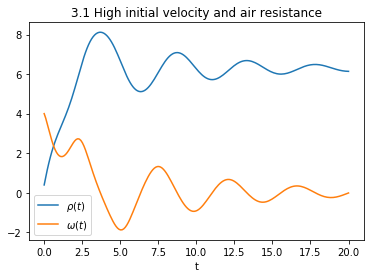

In [9]:
t = np.linspace(0,20,200)

# initial conditions
# 22.5 deg deflection, 4 velocity

v0 = [np.pi/8,4]

solution = odeint(system, v0, t, args=(-2,-0.3))

plt.plot(t,solution[:,0], label=r"$\rho(t)$")
plt.plot(t,solution[:,1], label=r"$\omega(t)$")
plt.title("3.1 High initial velocity and air resistance")
plt.xlabel("t")
plt.legend(loc='best')

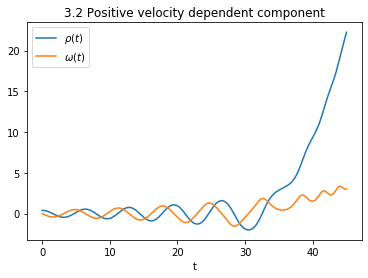

In [10]:
t = np.linspace(0,45,1000)

# initial conditions
# 22.5 deg deflection, 0 velocity

v0 = [np.pi/8,0]

solution = odeint(system, v0, t, args=(-1,0.1))

plt.plot(t,solution[:,0], label=r"$\rho(t)$")
plt.plot(t,solution[:,1], label=r"$\omega(t)$")
plt.title("3.2 Positive velocity dependent component")
plt.xlabel("t")
plt.legend(loc='best')

### 4. Implementing your own solver for ODEs
Next to more sophisticated ODE solvers like the one implemented by scipy, one can implement simple ODE integrators fairly easily on their own. The integrators are depending on the step size $\Delta t$ which decides the granularity of the integration. 
The simplest possible way of integrating a ODE numerically is described by the Euler method.<br>
$y_{n+1} = y_{n}+\Delta t f(t_n,y_n)$<br>

This method can be extended to the Midpoint method, which can be used to solve the system more accurately.<br>
$y_{n+1} = y_{n}+\Delta t f(t_n + \frac{\Delta t}{2},y_n\frac{\Delta t}{2} f(t_n,y_n))$<br>

Both methods are compared to a solution computed with the standard solver ode int, $\Delta t = \frac{1}{5}$ was chosen.
For figure 4.1 the same conditions as in figure 1. Were chosen. It becomes apparent, how the default Euler methods starts to deviate more and more from the supposed solution with ongoing simulation. The System is not stable and a decrease in step size could stabilize the solution only further in the beginning. The solver employing the Midpoint method solves the system much closer compared to the standard solver, and seems stable on the simulation interval.

This is also apparent, when one takes a look at the sum of the absolute residues from the standard solver over time in Figure 4.2. 
The Midpoint solver solved the system with a much smaller error. The error over the whole simulation of 20 time units is shown in Figure 4.3 as function of $\frac{1}{\Delta t}$. The Midpoint solver converges fast to the optimal solution, whereas the Euler solver cant reach these levels of optimally.


In [11]:
def eulerint(f,v0,t, args = ()):
    s = np.array([v0])
    for i in range(1,len(t)):  
        dt = t[i]-t[i-1]
        df = f(s[i-1],t[i],*args)  
        s = np.concatenate((s, [s[i-1] + dt*df]))
    return s

def midint(f,v0,t, args = ()):
    s = np.array([v0])
    for i in range(1,len(t)):  
        dt = t[i]-t[i-1]     
        k = f(s[i-1],t[i-1],*args)
        df = f(s[i-1]+dt/2*k,t[i-1]+dt/2,*args)  
        s = np.concatenate((s, [s[i-1] + dt*df]))
    return s

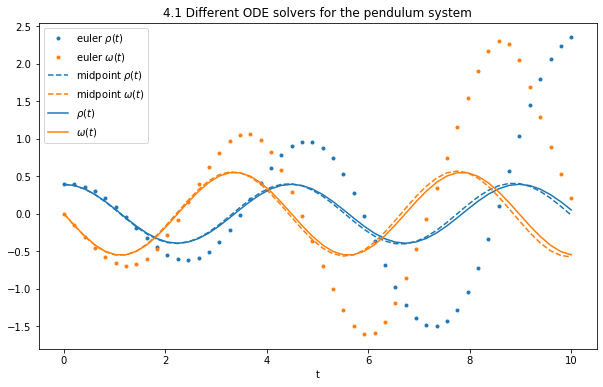

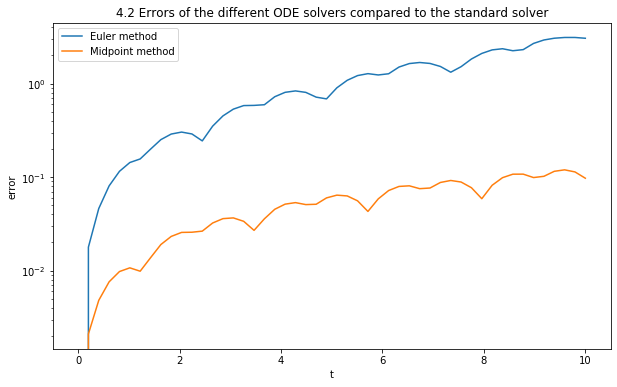

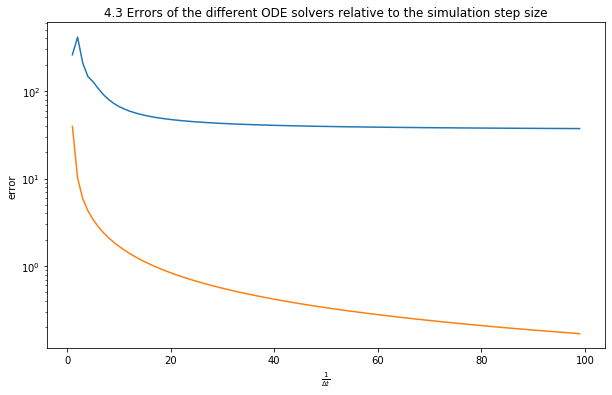

In [17]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

v0 = np.array([np.pi/8,0])
t = np.linspace(0,10,50)

esolution = eulerint(system, v0, t, args=(-2,0))
msolution = midint(system, v0, t, args=(-2,0))
dsolution = odeint(system, v0, t, args=(-2,0))

de=np.sum(np.abs(esolution-dsolution),axis=1)
dm=np.sum(np.abs(msolution-dsolution),axis=1)

plt.plot(t,esolution[:,0], ".", label=r"euler $\rho(t)$", c=colors[0])
plt.plot(t,esolution[:,1], ".",label=r"euler $\omega(t)$",  c=colors[1])
plt.plot(t,msolution[:,0], "--", label=r"midpoint $\rho(t)$", c=colors[0])
plt.plot(t,msolution[:,1], "--",label=r"midpoint $\omega(t)$",  c=colors[1])
plt.plot(t,dsolution[:,0], label=r"$\rho(t)$", c=colors[0])
plt.plot(t,dsolution[:,1], label=r"$\omega(t)$", c=colors[1])
plt.title("4.1 Different ODE solvers for the pendulum system")
plt.xlabel("t")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend(loc='best')
plt.show()

plt.plot(t,de, label="Euler method")
plt.plot(t,dm, label="Midpoint method")
plt.yscale("log")
plt.title("4.2 Errors of the different ODE solvers compared to the standard solver")
plt.legend(loc='best')
plt.ylabel("error")
plt.xlabel("t")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()


hs = np.arange(1,100)
e = []
m = []

for h in hs:
    v0 = np.array([np.pi/8,0])
    t = np.linspace(0,20,h*20)
    
    esolution = eulerint(system, v0, t, args=(-2,-0.2))
    msolution = midint(system, v0, t, args=(-2,-0.2))
    dsolution = odeint(system, v0, t, args=(-2,-0.2))
    
    de=np.sum(np.abs(esolution-dsolution))
    dm=np.sum(np.abs(msolution-dsolution))
    
    e.append(de)
    m.append(dm)

plt.plot(hs,e)
plt.plot(hs,m)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title("4.3 Errors of the different ODE solvers relative to the simulation step size")
plt.yscale("log")
plt.ylabel("error")
plt.xlabel(r"$\frac{1}{\Delta t}$")
plt.show()